## Photoelectrons comparison between CRY extracted and CORKSIKA for MDC2020ae

In [1]:
# External
import numpy as np
import uproot
import awkward as ak
import matplotlib.pyplot as plt

# Internal
sys.path.append(os.path.abspath("../PyMacros"))
import Utils as ut

In [52]:
# Get data
branchNames_ =  ["crvcoincs.sectorType"
                 , "crvcoincs.PEs"
                 , "crvcoincs.PEsPerLayer[4]"
                 , "crvcoincs.pos.fCoordinates.fX"
                 , "crvcoincs.pos.fCoordinates.fY" 
                 , "crvcoincs.pos.fCoordinates.fZ"
                ]
# My stuff
fileName1 = "/exp/mu2e/data/users/sgrant/CRVSim/CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.000/81168767/00/00000/nts.sgrant.CosmicCRYExtractedCatTriggered.MDC2020ae_best_v1_3.001205_00000014.root" 
with uproot.open(fileName1 + ":TrkAnaExt/trkana") as tree:
    data1_ = tree.arrays(branchNames_)

# Natalie's
fileName2 = "/exp/mu2e/data/users/nmharris/nts.nmharris.trkana-reco.MDC2020ae_perfect_v1_3.001202_00000000_all_vars.root" 
with uproot.open(fileName2 + ":TrkAna/trkana") as tree:
    data2_ = tree.arrays(branchNames_)                            

In [4]:
def Plot1D(data, nbins=100, xmin=-1.0, xmax=1.0, title=None, xlabel=None, ylabel=None, fout="hist.png", legPos="best", logX=False, logY=False, stats=True, underOver=False, errors=False, NDPI=300):
    
    data = np.array(data)
    # data = np.flatten(data)

    # Create figure and axes
    fig, ax = plt.subplots()

    # Plot the histogram with outline
    counts, bin_edges, _ = ax.hist(data, bins=nbins, range=(xmin, xmax), histtype='step', edgecolor='black', linewidth=1.0, fill=False, density=False)

    # Log scale 
    if logY:
        ax.set_yscale('log')
    if logX:
        ax.set_xscale('log')
        
    # Set x-axis limits
    ax.set_xlim(xmin, xmax)

    # Calculate statistics
    N, mean, meanErr, stdDev, stdDevErr, underflows, overflows = ut.GetBasicStats(data, xmin, xmax)

    # # Create legend text
    # legendText = f"Entries: {N}\nMean: {ut.ut.Round(mean, 3)}\nStd Dev: {ut.ut.Round(stdDev, 3)}"
    # if errors: legendText = f"Entries: {N}\nMean: {ut.ut.Round(mean, 3)}$\pm${ut.ut.Round(meanErr, 1)}\nStd Dev: {ut.ut.Round(stdDev, 3)}$\pm${ut.ut.Round(stdDevErr, 1)}"
    # if underOver: legendText += f"\nUnderflows: {underflows}\nOverflows: {overflows}"

    # # Create legend text
    legendText = f"Entries: {N}\nMean: {ut.Round(mean, 3)}\nStd Dev: {ut.Round(stdDev, 3)}"
    # if errors: legendText = f"Entries: {N}\nMean: {ut.Round(mean, 3)}$\pm${ut.Round(meanErr, 1)}\nStd Dev: {ut.Round(stdDev, 3)}$\pm${ut.Round(stdDevErr, 1)}"
    if errors: legendText = f"Entries: {N}\nMean: {ut.Round(mean, 4)}" + rf"$\pm$" + f"{ut.Round(meanErr, 1)}\nStd Dev: {ut.Round(stdDev, 4)}" rf"$\pm$" + f"{ut.Round(stdDevErr, 1)}"
    if underOver: legendText += f"\nUnderflows: {underflows}\nOverflows: {overflows}"


    # Add legend to the plot
    if stats: ax.legend([legendText], loc=legPos, frameon=False, fontsize=13)

    ax.set_title(title, fontsize=15, pad=10)
    ax.set_xlabel(xlabel, fontsize=13, labelpad=10) 
    ax.set_ylabel(ylabel, fontsize=13, labelpad=10) 

    # Set font size of tick labels on x and y axes
    ax.tick_params(axis='x', labelsize=13)  # Set x-axis tick label font size
    ax.tick_params(axis='y', labelsize=13)  # Set y-axis tick label font size

    # ut.ScientificNotation(ax)

    plt.tight_layout()

    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()

    # Clear memory
    plt.close()

    print("\n---> Written:\n\t", fout)

    return

In [5]:
def Plot1DOverlay(hists_, nbins=100, xmin=-1.0, xmax=1.0, title=None, xlabel=None, ylabel=None, fout="hist.png", label_=None, legPos="best", logX=False, logY=False, NDPI=300, includeBlack=False, legFontSize=12):

    # Create figure and axes
    fig, ax = plt.subplots()

    # Iterate over the hists and plot each one
    for i, (label, hist) in enumerate(hists_.items()):
        colour = ut.colours[i]
        if not includeBlack: colour = ut.colours[i+1]
        counts, bin_edges, _ = ax.hist(hist, bins=nbins, range=(xmin, xmax), histtype='step', edgecolor=colour, linewidth=1.0, fill=False, density=False, color=colour, label=label, log=logY)

    # Log scale 
    if logY:
        ax.set_yscale('log')
    if logX:
        ax.set_xscale('log')
        
    # Set x-axis limits
    ax.set_xlim(xmin, xmax)

    ax.set_title(title, fontsize=16, pad=10)
    ax.set_xlabel(xlabel, fontsize=14, labelpad=10) 
    ax.set_ylabel(ylabel, fontsize=14, labelpad=10) 

    # Set font size of tick labels on x and y axes
    ax.tick_params(axis='x', labelsize=14)  # Set x-axis tick label font size
    ax.tick_params(axis='y', labelsize=14)  # Set y-axis tick label font size
    
    # ut.ScientificNotation(ax)

    # Add legend to the plot
    ax.legend(loc=legPos, frameon=False, fontsize=legFontSize)

    plt.tight_layout()

    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    plt.show()

    # Clear memory
    plt.close()

    print("\n---> Written:\n\t", fout)

    return

/tmp/ipykernel_395022/3502071750.py:19: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xmin, xmax)


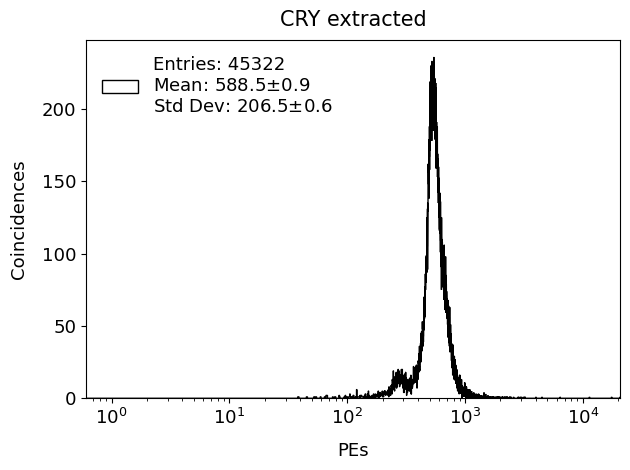


---> Written:
	 ../Images/MDC2020ae/PEs//h1_PEs_CRY.png


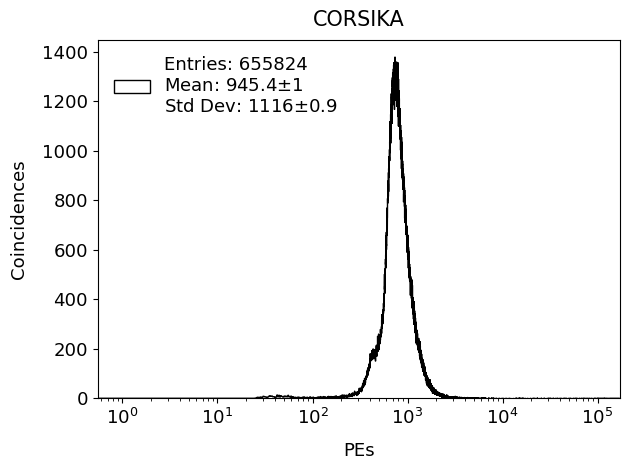


---> Written:
	 ../Images/MDC2020ae/PEs//h1_PEs_CORKSIKA.png


In [ ]:
# Filter CRV-T
sectorCondition1 = data1_["crvcoincs.sectorType"] == 1 # sector 1 in ext
sectorCondition2 = data2_["crvcoincs.sectorType"] == 3 # sector 3 in std

PEs1_ = ak.flatten(data1_["crvcoincs.PEs"][sectorCondition1], axis=None)
Plot1D(PEs1_, nbins=int(np.max(PEs1_)), title="CRY extracted", xlabel="PEs", ylabel="Coincidences", fout="../Images/MDC2020ae/PEs//h1_PEs_CRY.png", xmin=0, xmax=np.max(PEs1_), underOver=False, logX=True, errors=True)

PEs2_ = ak.flatten(data2_["crvcoincs.PEs"][sectorCondition2], axis=None)
Plot1D(PEs2_, nbins=int(np.max(PEs2_)), title="CORSIKA", xlabel="PEs", ylabel="Coincidences", fout="../Images/MDC2020ae/PEs//h1_PEs_CORSIKA.png", xmin=0, xmax=np.max(PEs2_), underOver=False, logX=True, errors=True)

Plot1DOverlay({"CRY ext." : PEs1_, 
               "CORSIKA" : PEs2_ },
               nbins=int(np.max(PEs2_)), xmin=0, xmax=np.max(PEs2_),
               title="MDC2020ae, CRV-T", xlabel="PEs", ylabel="Coincidences", fout="../Images/MDC2020ae/PEs//h1_PEs_CRVT_overlay.png",
               logX=True, logY=True, legPos="upper left")

/tmp/ipykernel_395022/3502071750.py:19: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xmin, xmax)


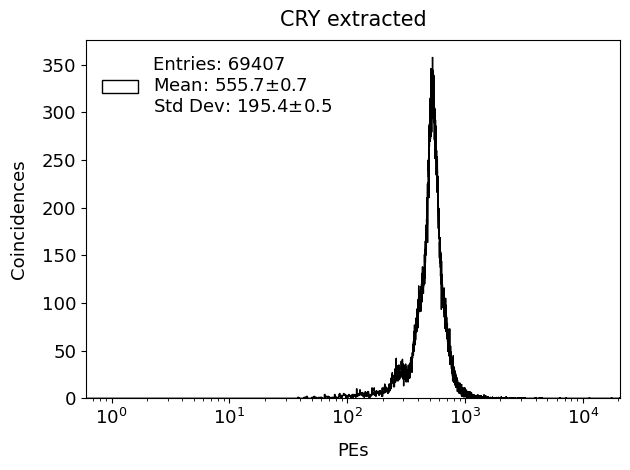


---> Written:
	 ../Images/MDC2020ae/PEs//h1_PEs_CRY.png


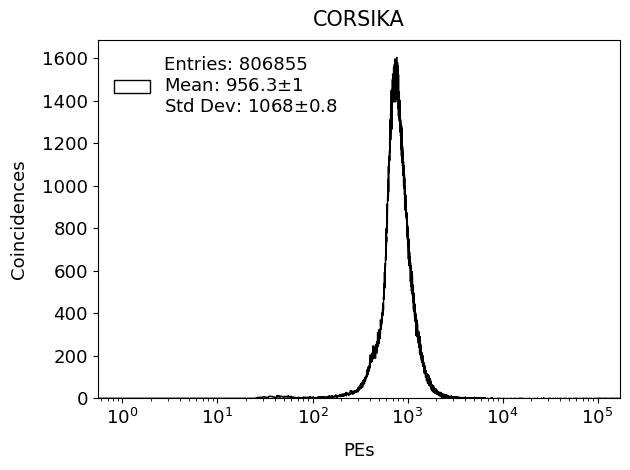


---> Written:
	 ../Images/MDC2020ae/PEs//h1_PEs_CORKSIKA.png


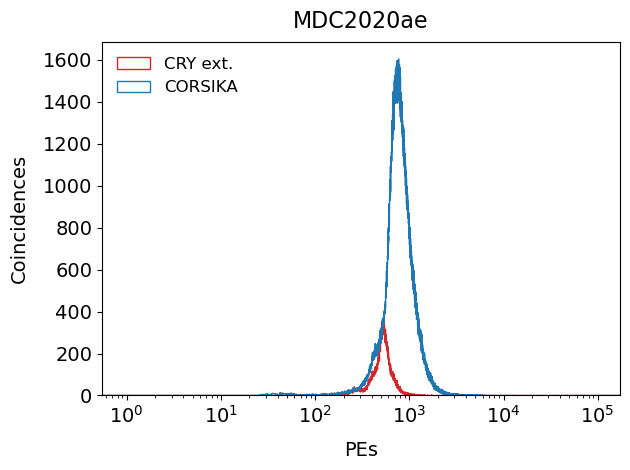


---> Written:
	 ../Images/MDC2020ae/PEs//h1_PEs_overlay.png


In [6]:


PEs1_ = ak.flatten(data1_["crvcoincs.PEs"], axis=None)
Plot1D(PEs1_, nbins=int(np.max(PEs1_)), title="CRY extracted", xlabel="PEs", ylabel="Coincidences", fout="../Images/MDC2020ae/PEs//h1_PEs_CRY.png", xmin=0, xmax=np.max(PEs1_), underOver=False, logX=True, errors=True)

PEs2_ = ak.flatten(data2_["crvcoincs.PEs"], axis=None)
Plot1D(PEs2_, nbins=int(np.max(PEs2_)), title="CORSIKA", xlabel="PEs", ylabel="Coincidences", fout="../Images/MDC2020ae/PEs//h1_PEs_CORKSIKA.png", xmin=0, xmax=np.max(PEs2_), underOver=False, logX=True, errors=True)

Plot1DOverlay({"CRY ext." : PEs1_, 
               "CORSIKA" : PEs2_ },
               nbins=int(np.max(PEs2_)), xmin=0, xmax=np.max(PEs2_),
               title="MDC2020ae", xlabel="PEs", ylabel="Coincidences", fout="../Images/MDC2020ae/PEs//h1_PEs_overlay.png",
               logX=True, legPos="upper left")

/tmp/ipykernel_395022/1351271023.py:19: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xmin, xmax)


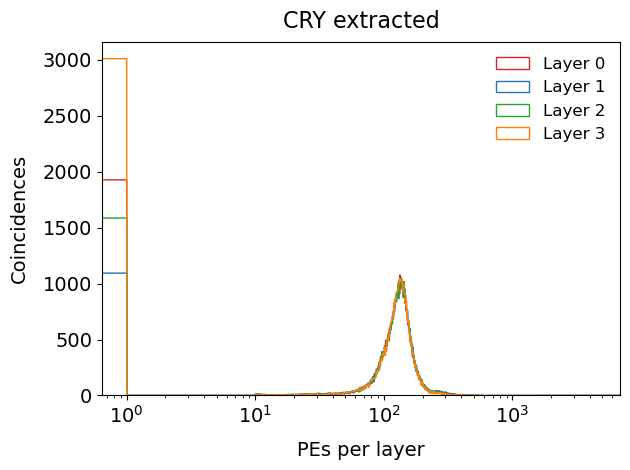


---> Written:
	 ../Images/MDC2020ae/PEs//h1_PEsPerLayer_1.png


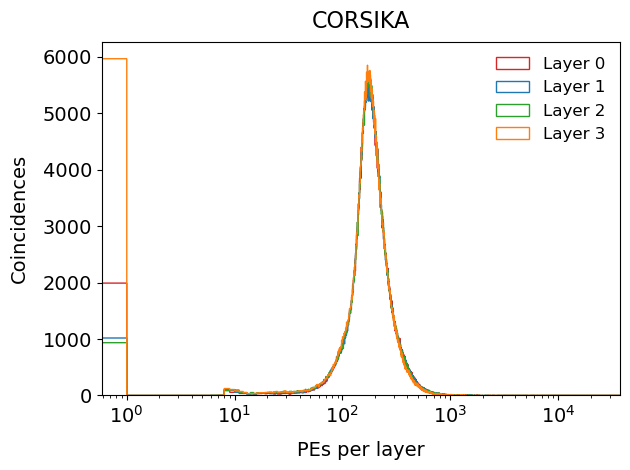


---> Written:
	 ../Images/MDC2020ae/PEs//h1_PEsPerLayer_2.png


In [7]:
PEsPerLayer1_0 = ak.flatten(data1_["crvcoincs.PEsPerLayer[4]"][:,:,0], axis=None)

Plot1DOverlay({"Layer 0" : PEsPerLayer1_0, 
               "Layer 1" : ak.flatten(data1_["crvcoincs.PEsPerLayer[4]"][:,:,1], axis=None),
               "Layer 2" : ak.flatten(data1_["crvcoincs.PEsPerLayer[4]"][:,:,2], axis=None),
               "Layer 3" : ak.flatten(data1_["crvcoincs.PEsPerLayer[4]"][:,:,3], axis=None) },
               nbins=int(np.max(PEsPerLayer1_0)), xmin=0, xmax=np.max(PEsPerLayer1_0),
               title="CRY extracted", xlabel="PEs per layer", ylabel="Coincidences", fout="../Images/MDC2020ae/PEs//h1_PEsPerLayer_1.png", 
               logX=True)

PEsPerLayer2_0 = ak.flatten(data2_["crvcoincs.PEsPerLayer[4]"][:,:,0], axis=None)

Plot1DOverlay({"Layer 0" : PEsPerLayer2_0, 
               "Layer 1" : ak.flatten(data2_["crvcoincs.PEsPerLayer[4]"][:,:,1], axis=None),
               "Layer 2" : ak.flatten(data2_["crvcoincs.PEsPerLayer[4]"][:,:,2], axis=None),
               "Layer 3" : ak.flatten(data2_["crvcoincs.PEsPerLayer[4]"][:,:,3], axis=None) },
               nbins=int(np.max(PEsPerLayer2_0)), xmin=0, xmax=np.max(PEsPerLayer2_0),
               title="CORSIKA", xlabel="PEs per layer", ylabel="Coincidences", fout="../Images/MDC2020ae/PEs//h1_PEsPerLayer_2.png", 
               logX=True)

In [12]:
# Positions 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import ScalarFormatter

def PlotGraph3D(x, y, z, title=None, xlabel=None, ylabel=None, zlabel=None, fout="scatter3d.png", NDPI=300):

    # Create figure and 3D axes
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create a 3D scatter plot
    ax.scatter(x, y, z, color='black', s=16, edgecolor='black', marker='o')

    # Set title, xlabel, ylabel, and zlabel
    ax.set_title(title, fontsize=16, pad=10)
    ax.set_xlabel(xlabel, fontsize=14, labelpad=10)
    ax.set_ylabel(ylabel, fontsize=14, labelpad=10)
    ax.set_zlabel(zlabel, fontsize=14, labelpad=10)

    # Set font size of tick labels on x, y, and z axes
    ax.tick_params(axis='x', labelsize=14)  # Set x-axis tick label font size
    ax.tick_params(axis='y', labelsize=14)  # Set y-axis tick label font size
    ax.tick_params(axis='z', labelsize=14)  # Set z-axis tick label font size

    # Check if x, y, or z values exceed 9999 for scientific notation
    if max(x) > 999:
        ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
        ax.xaxis.offsetText.set_fontsize(14)
    if max(y) > 999:
        ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        ax.yaxis.offsetText.set_fontsize(14)
    if max(z) > 999:
        ax.zaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style='sci', axis='z', scilimits=(0, 0))
        ax.zaxis.offsetText.set_fontsize(14)

    plt.tight_layout()

    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    print("---> Written", fout)
    
    plt.show()

    # Clear memory
    plt.close()

    return

In [61]:
def PlotGraphOverlay(graphs_, title=None, xlabel=None, ylabel=None, ymin=1, ymax=-1, labels_=[], fout="scatter.png", log=False, NDPI=300):
    
    # Create figure and axes
    fig, ax = plt.subplots()

    # Iterate over each pair of xy lists
    for i, (label, data_) in enumerate(graphs_.items()):

        x = data_[0]
        xerr = data_[1]
        y = data_[2]
        yerr = data_[3]

         # Plot scatter with error bars
        if len(xerr)==0: xerr = [0] * len(x) # Sometimes we only use yerr
        if len(yerr)==0: yerr = [0] * len(y) # Sometimes we only use yerr

        ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', color=ut.colours[i+1], markersize=4, ecolor=ut.colours[i+1], capsize=2, elinewidth=1, linestyle=None, label=label)

    if log: 
        ax.set_yscale("log")

    # Set title, xlabel, and ylabel
    ax.set_title(title, fontsize=15, pad=10)
    ax.set_xlabel(xlabel, fontsize=13, labelpad=10)
    ax.set_ylabel(ylabel, fontsize=13, labelpad=10)

    # Set font size of tick labels on x and y axes
    ax.tick_params(axis='x', labelsize=13)  
    ax.tick_params(axis='y', labelsize=13)  

    if (ymax > ymin):
        ax.set_ylim(ymin, ymax)
        
    # Disable scientific notation

    # Check if x or y values exceed 9999 for scientific notation
    # if any(max(data_[0]) > 9999 for _, data_ in graphs_.items()) or any(max(data_[0]) < 9.99e-4 for _, data_ in graphs_.items()):
    #     ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #     ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    #     ax.xaxis.offsetText.set_fontsize(13)
    # if any(max(data_[2]) > 9999 for _, data_ in graphs_.items()) or any(max(data_[2]) < 9.99e-4 for _, data_ in graphs_.items()):
    #     ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    #     ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    #     ax.yaxis.offsetText.set_fontsize(13)

    ax.legend(loc="best", frameon=False, fontsize=13) # , markerscale=5)

    # Save the figure

    plt.tight_layout()

    plt.savefig(fout, dpi=NDPI, bbox_inches="tight")
    print("---> Written", fout)
    
    plt.show()

    # Clear memory
    plt.close()

    return

In [48]:
print(list(set(ak.flatten(data2_["crvcoincs.sectorType"], axis=None))))

[1, 2, 3, 4, 5, 6, 9]


---> Written ../Images/MDC2020ae/Sectors/gr_zy_standard.png
---> Written ../Images/MDC2020ae/Sectors/gr_zy_standard.png


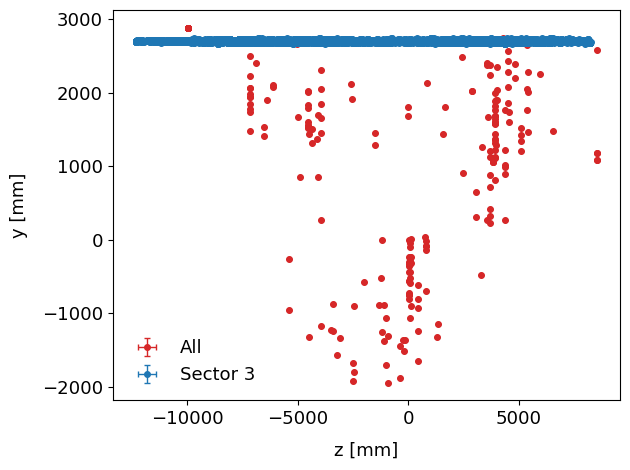

---> Written ../Images/MDC2020ae/Sectors/gr_xy_standard.png
---> Written ../Images/MDC2020ae/Sectors/gr_xy_standard.png


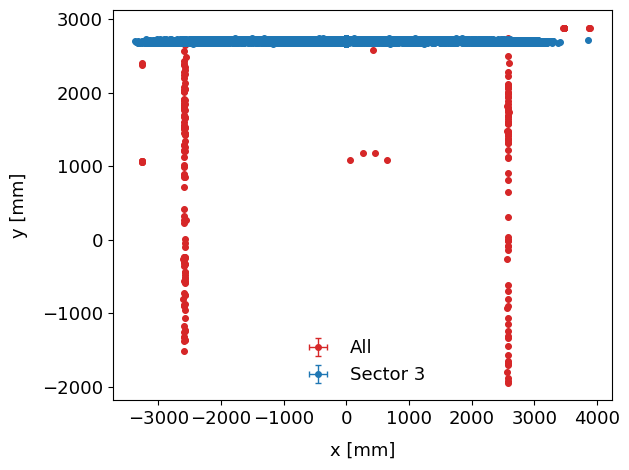

In [54]:
# Filter sector 1 (CRV-T)
# data1_ = data1_[data1_["crvcoincs.sectorType"] == 1]

# print(list(set(ak.flatten(data2_["crv"]["crvcoincs.sectorType"], axis=None))))

length=1e3

sector = 3
sectorCondition = data2_["crvcoincs.sectorType"] == sector

graphs_ = { "All" : [ ak.flatten(data2_["crvcoincs.pos.fCoordinates.fZ"], axis=None)[:length], [], ak.flatten(data2_["crvcoincs.pos.fCoordinates.fY"], axis=None)[:length], [] ] 
           , f"Sector {sector}" : [ ak.flatten(data2_["crvcoincs.pos.fCoordinates.fZ"][sectorCondition], axis=None), [], ak.flatten(data2_["crvcoincs.pos.fCoordinates.fY"][sectorCondition], axis=None), [] ]
          }

PlotGraphOverlay(graphs_, xlabel="z [mm]", ylabel="y [mm]", fout="../Images/MDC2020ae/Sectors/gr_zy_standard.png")

graphs_ = { "All" : [ ak.flatten(data2_["crvcoincs.pos.fCoordinates.fX"], axis=None)[:length], [], ak.flatten(data2_["crvcoincs.pos.fCoordinates.fY"], axis=None)[:length], [] ] 
           , f"Sector {sector}" : [ ak.flatten(data2_["crvcoincs.pos.fCoordinates.fX"][sectorCondition], axis=None), [], ak.flatten(data2_["crvcoincs.pos.fCoordinates.fY"][sectorCondition], axis=None), [] ]
          }

PlotGraphOverlay(graphs_, xlabel="x [mm]", ylabel="y [mm]", fout="../Images/MDC2020ae/Sectors/gr_xy_standard.png")


---> Written ../Images/MDC2020ae/Sectors/gr_zy_standard.png


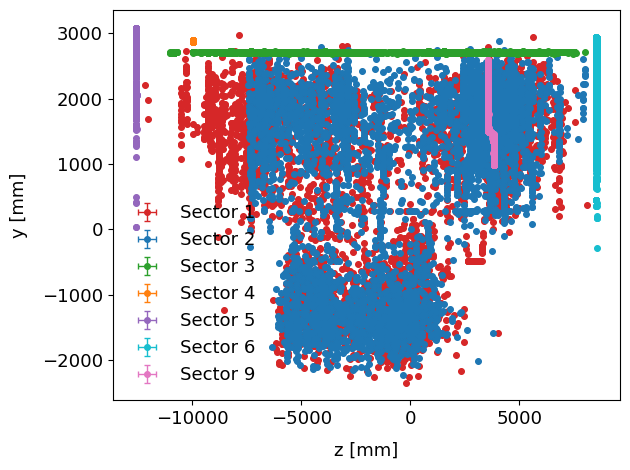

---> Written ../Images/MDC2020ae/Sectors/gr_xy_standard.png


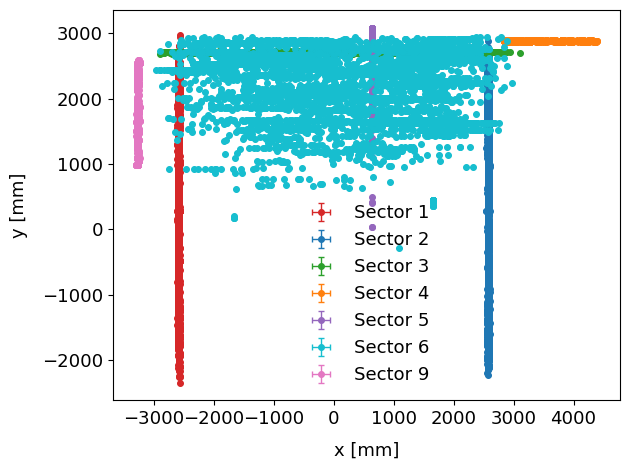

In [62]:
length=5e3
sectors_ = list(set(ak.flatten(data2_["crvcoincs.sectorType"], axis=None)))

gr_zy_ = {}
gr_xy_ = {}

for sector in sectors_: 

    sectorCondition = data2_["crvcoincs.sectorType"] == sector

    x = ak.flatten(data2_["crvcoincs.pos.fCoordinates.fX"][sectorCondition], axis=None)[:length]
    y = ak.flatten(data2_["crvcoincs.pos.fCoordinates.fY"][sectorCondition], axis=None)[:length]
    z = ak.flatten(data2_["crvcoincs.pos.fCoordinates.fZ"][sectorCondition], axis=None)[:length]

    gr_zy_[f"Sector {sector}"] = [ z, [], y, [] ] 
    gr_xy_[f"Sector {sector}"] = [ x, [], y, [] ] 

PlotGraphOverlay(gr_zy_, xlabel="z [mm]", ylabel="y [mm]", fout="../Images/MDC2020ae/Sectors/gr_zy_std.png")
PlotGraphOverlay(gr_xy_, xlabel="x [mm]", ylabel="y [mm]", fout="../Images/MDC2020ae/Sectors/gr_xy_std.png")

---> Written ../Images/MDC2020ae/Sectors/gr_zy_ext.png


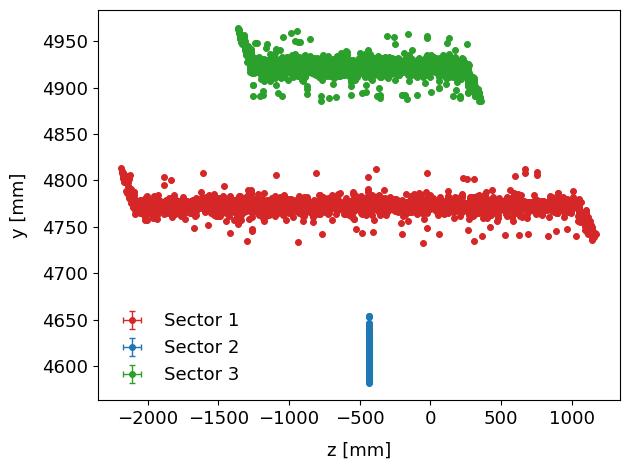

---> Written ../Images/MDC2020ae/Sectors/gr_xy_ext.png


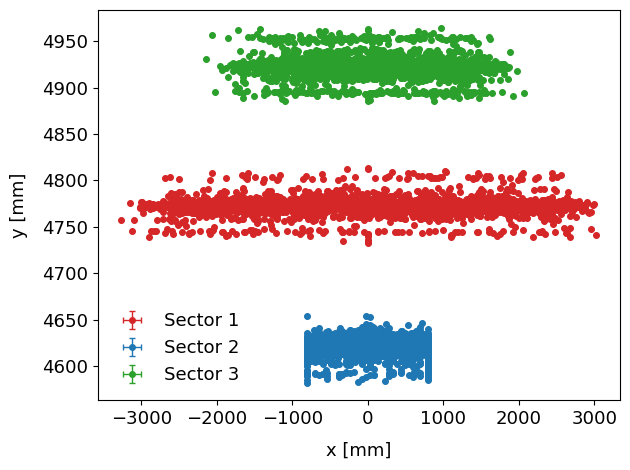

In [63]:
length=5e3
sectors_ = list(set(ak.flatten(data1_["crvcoincs.sectorType"], axis=None)))

gr_zy_ = {}
gr_xy_ = {}

for sector in sectors_: 

    sectorCondition = data1_["crvcoincs.sectorType"] == sector

    x = ak.flatten(data1_["crvcoincs.pos.fCoordinates.fX"][sectorCondition], axis=None)[:length]
    y = ak.flatten(data1_["crvcoincs.pos.fCoordinates.fY"][sectorCondition], axis=None)[:length]
    z = ak.flatten(data1_["crvcoincs.pos.fCoordinates.fZ"][sectorCondition], axis=None)[:length]

    gr_zy_[f"Sector {sector}"] = [ z, [], y, [] ] 
    gr_xy_[f"Sector {sector}"] = [ x, [], y, [] ] 

PlotGraphOverlay(gr_zy_, xlabel="z [mm]", ylabel="y [mm]", fout="../Images/MDC2020ae/Sectors/gr_zy_ext.png")
PlotGraphOverlay(gr_xy_, xlabel="x [mm]", ylabel="y [mm]", fout="../Images/MDC2020ae/Sectors/gr_xy_ext.png")